In [8]:
# library Import

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
# load the data

df = pd.read_csv('HousePrices/data/train.csv', index_col=0)
print(df.shape)

(1460, 80)


In [10]:
print(df.columns.values)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleType' '

In [13]:
focus = df[['GrLivArea','SalePrice']]
focus.head(10)

,GrLivArea,SalePrice
Id,,
1,1710,208500
2,1262,181500
3,1786,223500
4,1717,140000
5,2198,250000
6,1362,143000
7,1694,307000
8,2090,200000
9,1774,129900


<function matplotlib.pyplot.show(*args, **kw)>

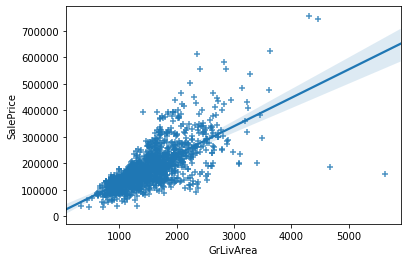

In [48]:
# etude de la correlation entre deux features

import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='GrLivArea',y='SalePrice', data=focus, marker="+")
plt.show

In [19]:
# split du train full set en train et val set

train, val=train_test_split(focus, test_size=0.2)

print("Train full shape: " + str(focus.shape))
print("Train shape: " + str(train.shape))
print("Val shape: " + str(val.shape))

Train full shape: (1460, 2)
Train shape: (1168, 2)
Val shape: (292, 2)


In [22]:
# Preparation du X et Y train

target_column = 'SalePrice'

y_train = train[target_column].values
print(y_train)

[137900 317000  86000 ... 146500 314813 305900]


In [21]:
X_train = train.drop(target_column, axis=1).values
print(X_train)

[[2136]
 [2473]
 [ 630]
 ...
 [1644]
 [1828]
 [2000]]


In [23]:
# Preparation du X et Y val

X_val = val.drop(target_column, axis=1).values
y_val = val[target_column].values

In [24]:
# modele

simplelinearRegression = LinearRegression()
simplelinearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
# test with an squarefeet surface 


dict = {
    "GrLivArea" : [1500]
}

In [37]:
df = pd.DataFrame(dict)
df

,GrLivArea
0,1500


In [40]:
X_predict = df.values
print(X_predict)

y_predict = simplelinearRegression.predict(X_predict)
price = y_predict[0]
print(f"Le modele prédit un prix de vente de {round(price)} $")

[[1500]]
Le modele prédit un prix de vente de 179583.0 $
